In [4]:
import slicer
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import random

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torchvision.transforms.functional as TF

import nibabel as nib

import matplotlib.pyplot as plt


In [5]:
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

In [8]:
root_dir="data/ct_mr_train"
modality = "MR"
if modality=="MR":
    images_path="mr_train"
    images_list="mr_train.csv"

elif modality=="CT":
    images_path="ct_train"
    images_list="ct_train.csv"

basic_transforms = transforms.Compose([
            transforms.ToPILImage(mode='I'),
            transforms.CenterCrop(size=256),
            transforms.ToTensor()
            ])

rotation_angle = 15
shift_range = [0.3,0.3]
shear_range = 0.1
zoom_range = 1.4

basic_augmentations = {'rotation_angle': rotation_angle, 'shift_range': shift_range, 'shear_range': shear_range, 'zoom_range': zoom_range }

dataset = slicer.CT_MR_Train(root_dir,modality,images_path,images_list,transform=basic_transforms, augment_param=basic_augmentations)
print("All ok: ", len(dataset))

All ok:  20


In [16]:
sample = dataset[2]

image = sample['image']
label = sample['label']

label.shape

torch.Size([288, 256, 256])

Text(0.5, 0.98, 'Center slices for EPI image')

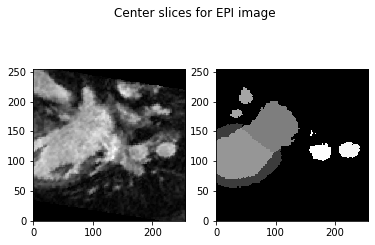

In [17]:
slice_0 = image[144, :, :]
slice_1 = label[144, :, :]

show_slices([slice_0, slice_1])
plt.suptitle("Center slices for EPI image")  